In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

In [3]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
Housing_data=pd.read_csv('HOUSING_DATA.csv')
Housing_data


,Indicator,RegionID,Date,Year,Home_value,Mongo_ID,City_Name,City_Size
0,ZATT,42415,1/31/2021,2021,334409,60403049bff9453704dc7595,"Waterloo, IA",Medium
1,ZATT,42415,12/31/2020,2020,332905,60403049bff9453704dc7596,"Waterloo, IA",Medium
2,ZATT,42415,11/30/2020,2020,331546,60403049bff9453704dc7597,"Waterloo, IA",Medium
3,ZATT,42415,10/31/2020,2020,334579,60403049bff9453704dc7598,"Waterloo, IA",Medium
4,ZATT,42415,9/30/2020,2020,336513,60403049bff9453704dc7599,"Waterloo, IA",Medium
...,...,...,...,...,...,...,...,...
2860,ZATT,394692,5/31/1996,1996,203496,60403609bff9453704dd3fdc,"Houston, TX",Big
2861,ZATT,394692,4/30/1996,1996,203364,60403609bff9453704dd3fdd,"Houston, TX",Big
2862,ZATT,394692,3/31/1996,1996,203177,60403609bff9453704dd3fde,"Houston, TX",Big
2863,ZATT,394692,2/29/1996,1996,203184,60403609bff9453704dd3fdf,"Houston, TX",Big


Shape:  (2865, 1) (2865, 1)
Housing R2 Score: 0.12598729182437673


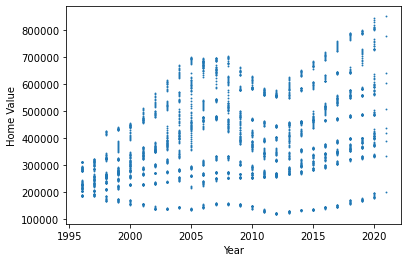

In [5]:
###  ALL ten cities=  Statistics

X = Housing_data['Year'].values.reshape(-1,1)
y= Housing_data['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
Housingmodel=LinearRegression()
Housingmodel.fit(X,y)
Housingscore=Housingmodel.score(X,y)
print(f"Housing R2 Score: {Housingscore}")

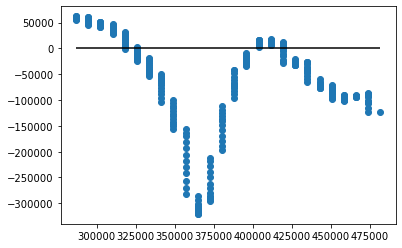

In [27]:
###  ALLcities predictions

predictions = Housingmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [ ]:
###   Using several cities (as a substitute for nationwide statistics) is not helpful.  SO, look at individual cities. 


In [6]:
### CREATE separate dataframes per city

Houston = Housing_data.loc[Housing_data['City_Name']=='Houston, TX']

Boston = Housing_data.loc[Housing_data['City_Name']=='Boston, MA']

Waterloo = Housing_data.loc[Housing_data['City_Name']=='Waterloo, IA']

SantaFe = Housing_data.loc[Housing_data['City_Name']=='Santa Fe, NM']

StAugustine = Housing_data.loc[Housing_data['City_Name']=='St. Augustine, FL']

Williamsburg = Housing_data.loc[Housing_data['City_Name']=='Williamsburg, VA']

Portland = Housing_data.loc[Housing_data['City_Name']=='Portland, WA']

Cookeville = Housing_data.loc[Housing_data['City_Name']=='Cookeville, TN']

Charlotte = Housing_data.loc[Housing_data['City_Name']=='Charlotte, NC']

Chicago = Housing_data.loc[Housing_data['City_Name']=='Chicago, IL']


Shape:  (301, 1) (301, 1)
Houston R2 Score: 0.9024825813106777


Text(2009, 225000, 'y = 6799.92x + -13379523.23')

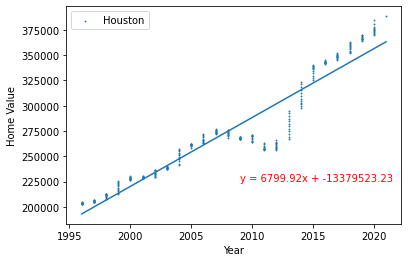

In [48]:
###  HOUSTON

X = Houston['Year'].values.reshape(-1,1)
y= Houston['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

plt.scatter(X,y, s=0.75, label='Houston')
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")

Houstonmodel=LinearRegression()
Houstonmodel.fit(X,y)
Houstonscore=Houstonmodel.score(X,y)
print(f"Houston R2 Score: {Houstonscore}")

#add the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(Houston['Year'],Houston['Home_value'])
regress_values = Houston['Year'] * slope + intercept
plt.plot(Houston['Year'],regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.annotate(line_eq,(2009,225000),fontsize=10,color="red")

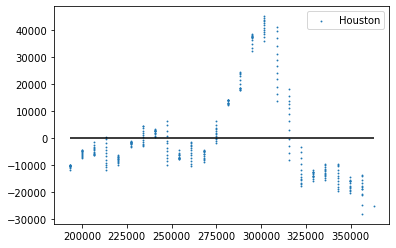

In [44]:
###  HOUSTON predictions

predictions = Houstonmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y, s= 0.75, label='Houston')
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (273, 1) (273, 1)
Santa Fe R2 Score: 0.5583904458073568


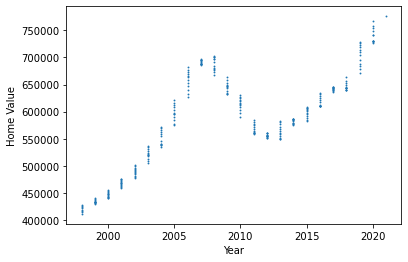

In [9]:
###  SANTE FE

X = SantaFe['Year'].values.reshape(-1,1)
y= SantaFe['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
SantaFemodel=LinearRegression()
SantaFemodel.fit(X,y)
SantaFescore=SantaFemodel.score(X,y)
print(f"Santa Fe R2 Score: {SantaFescore}")

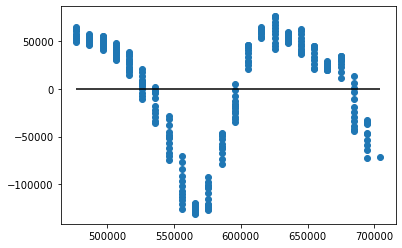

In [10]:
###  SANTE FE predictions

predictions = SantaFemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()


Shape:  (301, 1) (301, 1)
Chicago R2 Score: 0.19056912223812195


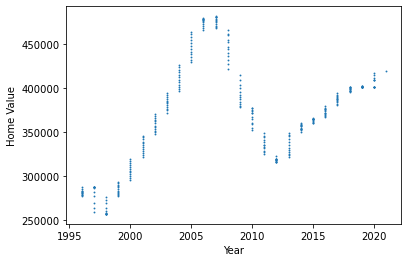

In [11]:
###  Chicago

X = Chicago['Year'].values.reshape(-1,1)
y= Chicago['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Chicagomodel=LinearRegression()
Chicagomodel.fit(X,y)
Chicagoscore=Chicagomodel.score(X,y)
print(f"Chicago R2 Score: {Chicagoscore}")

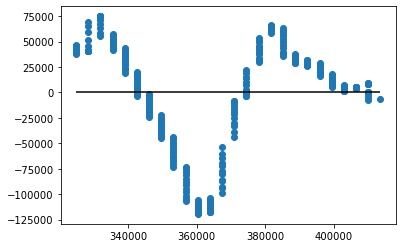

In [12]:
###  Chicago predictions

predictions = Chicagomodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (301, 1) (301, 1)
Charlotte R2 Score: -33.37615432904959


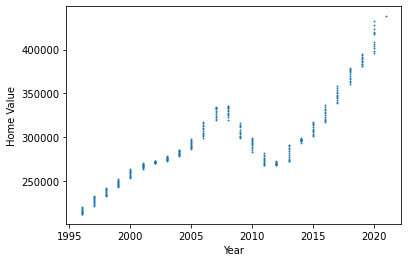

In [13]:
###  Charlotte

X = Charlotte['Year'].values.reshape(-1,1)
y= Charlotte['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Charlottemodel=LinearRegression()
Charlottemodel.fit(X,y)
Charlottescore=SantaFemodel.score(X,y)
print(f"Charlotte R2 Score: {Charlottescore}")

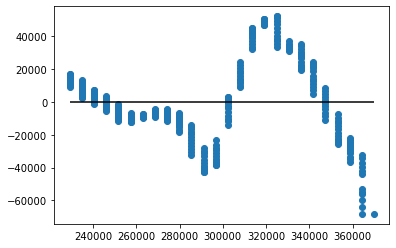

In [14]:
###  Charlotte predictions

predictions = Charlottemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (301, 1) (301, 1)
Boston R2 Score: 0.7534606466744083


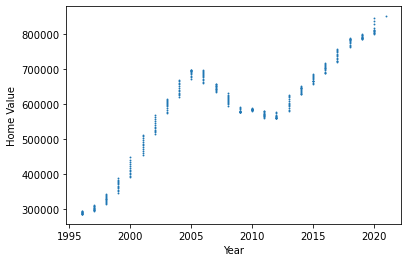

In [15]:
###  Boston

X = Boston['Year'].values.reshape(-1,1)
y= Boston['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Bostonmodel=LinearRegression()
Bostonmodel.fit(X,y)
Bostonscore=Bostonmodel.score(X,y)
print(f"Boston R2 Score: {Bostonscore}")

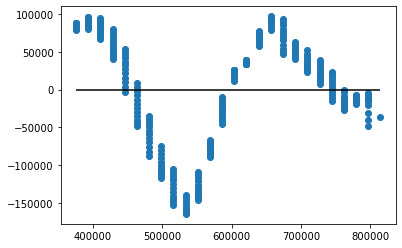

In [16]:
###  Boston predictions

predictions = Bostonmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (301, 1) (301, 1)
Cookeville R2 Score: 0.07829095270829312


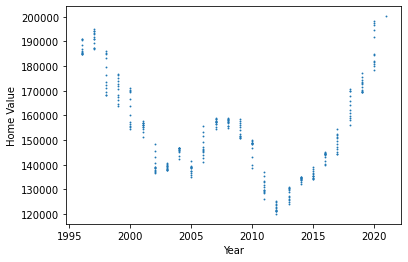

In [17]:
###  Cookeville

X = Cookeville['Year'].values.reshape(-1,1)
y= Cookeville['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Cookevillemodel=LinearRegression()
Cookevillemodel.fit(X,y)
Cookevillescore=Cookevillemodel.score(X,y)
print(f"Cookeville R2 Score: {Cookevillescore}")

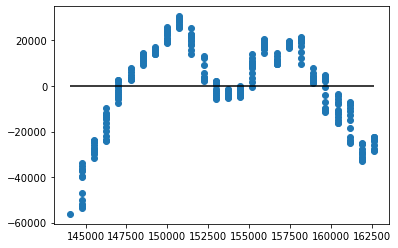

In [18]:
###  Cookeville predictions

predictions = Cookevillemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (301, 1) (301, 1)
Williamsburg R2 Score: -3.6288768667310887


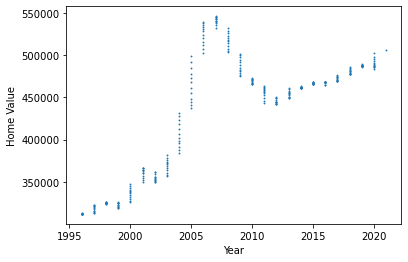

In [19]:
###  Williamsburg

X = Williamsburg['Year'].values.reshape(-1,1)
y= Williamsburg['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Home Value")
Williamsburgmodel=LinearRegression()
Williamsburgmodel.fit(X,y)
Williamsburgscore=SantaFemodel.score(X,y)
print(f"Williamsburg R2 Score: {Williamsburgscore}")

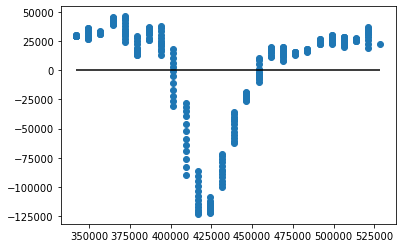

In [20]:
###  Williamsburg predictions

predictions = Williamsburgmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.legend(loc="best")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (184, 1) (184, 1)
Waterloo R2 Score: 0.9311989715045836


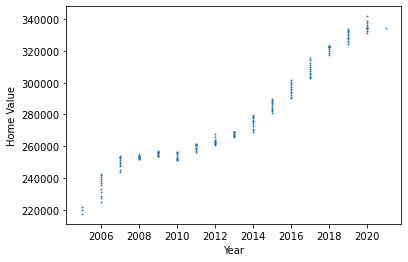

In [21]:
###  Waterloo

X = Waterloo['Year'].values.reshape(-1,1)
y= Waterloo['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
Waterloomodel=LinearRegression()
Waterloomodel.fit(X,y)
Waterlooscore=Waterloomodel.score(X,y)
print(f"Waterloo R2 Score: {Waterlooscore}")

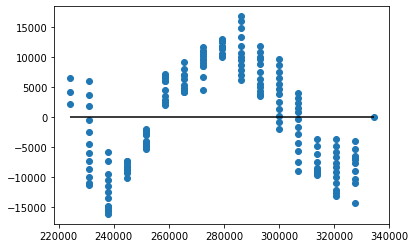

In [22]:
###  Waterloo predictions

predictions = Waterloomodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (301, 1) (301, 1)
Portland R2 Score: 0.7981923295659716


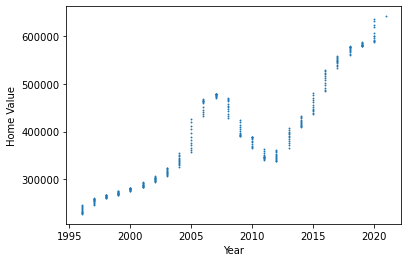

In [23]:
###  Portland

X = Portland['Year'].values.reshape(-1,1)
y= Portland['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
Portlandmodel=LinearRegression()
Portlandmodel.fit(X,y)
Portlandscore=Portlandmodel.score(X,y)
print(f"Portland R2 Score: {Portlandscore}")

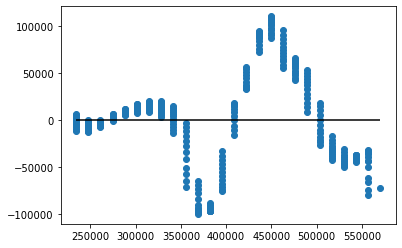

In [24]:
###  Portland predictions

predictions = Portlandmodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Shape:  (301, 1) (301, 1)
StAugustine R2 Score: 0.4496070922667377


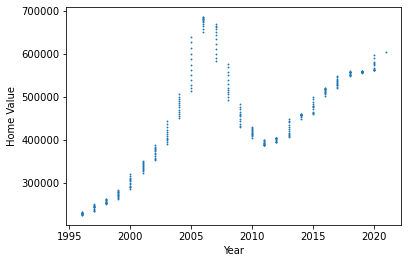

In [25]:
###  StAugustine

X = StAugustine['Year'].values.reshape(-1,1)
y= StAugustine['Home_value'].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)
plt.scatter(X,y, s=0.75)
plt.xlabel("Year")
plt.ylabel("Home Value")
StAugustinemodel=LinearRegression()
StAugustinemodel.fit(X,y)
StAugustinescore=StAugustinemodel.score(X,y)
print(f"StAugustine R2 Score: {StAugustinescore}")

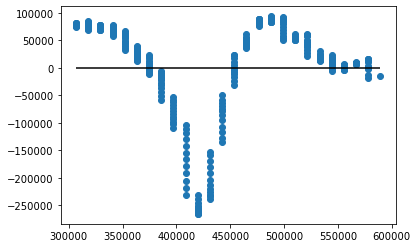

In [26]:
###  StAugustine predictions

predictions = StAugustinemodel.predict(X)

#plot residuals
plt.scatter(predictions, predictions -y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [76]:
####  STATISTICS RELATED TO CITY SIZE  #########
####  Here, we will try to predict range of home values at different price points(ie budgets).  
####  what we expect to see:  at thtei higher budgets, the predicted range will be larger, as compared to lower budgets.


#BigCities = Housing_data.loc[Housing_data['City_Size']=='Big']
#BigCities
#MediumCities = Housing_data.loc[Housing_data['City_Size']=='Medium']
#MediumCities

In [100]:
### SPLIT DATA INTO TRAINING AND TESTING  ###

X = Housing_data["Year"].values.reshape(-1, 1)
y = Housing_data["Home_value"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


Shape:  (2865, 1) (2865, 1)


In [101]:
ALLmodel = LinearRegression()

In [102]:
ALLmodel.fit(X_train, y_train)

LinearRegression()

In [106]:
predicted = ALLmodel.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

## again, this shows that using various locations for predictions is NOT good

Mean Squared Error (MSE): 19955632652.14131
R-squared (R2 ): 0.12689204065534165
